# DS 5030 Project 1

### Names: Erin Siedlecki, Shaveen Saadee, Anna Li, Emily Garman, Razan Habboub, Marissa Burton


## Question 1

In [29]:
import pickle, music21, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [30]:
df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")
swift = df.query("spotify_artist_id == '06HL4z0CvFAxyc27GXpf02'")

/var/folders/5v/fn650dwj2198gn_4j1ss7r8h0000gn/T/ipykernel_98380/2489596892.py:1: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [35]:
swift.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
10794,10795,<verse_1> C Amin F C Amin F C Amin F G C G Ami...,NaN,'pop',NaN,NaN,artist_6080,pop,NaN,06HL4z0CvFAxyc27GXpf02
11295,11296,<intro_1> G Cadd9 G Cadd9 <verse_1> G Cadd9 G ...,2019-12-06,'pop',2010.0,NaN,artist_6080,pop,2mvabkN1i2gLnGAPUVdwek,06HL4z0CvFAxyc27GXpf02
15894,15895,<verse_1> Amin F G Dmin Amin F G Dmin Amin C G...,NaN,'pop',NaN,NaN,artist_6080,pop,NaN,06HL4z0CvFAxyc27GXpf02
16233,16234,<intro_1> Cmaj7 Dsus2 Amin Cmaj7 Dsus2 Amin <v...,2022-10-21,'pop',2020.0,NaN,artist_6080,pop,5jQI2r1RdgtuT8S3iG8zFC,06HL4z0CvFAxyc27GXpf02
18801,18802,<intro_1> Dmin E7 Amin <verse_1> E/Gs C/G Fsdi...,2022-01-21,'pop',2020.0,NaN,artist_6080,pop,3tGq7hWDCtrnL83y5OGual,06HL4z0CvFAxyc27GXpf02


In [ ]:
# checking for missing values
swift.isna().sum() 

id                     0
chords                 0
release_date          79
genres                 0
decade                79
rock_genre           185
artist_id              0
main_genre             0
spotify_song_id       35
spotify_artist_id      0
dtype: int64

In [31]:
taylor = pd.read_csv('swift_mapped.csv')
taylor.head()

,id,time,chord,root,1,2,3,4,5,6,7,8,9,10,11,12
0,10795,1,C,C,1,0,0,0,1,0,0,1,0,0,0,0
1,10795,2,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
2,10795,3,F,F,1,0,0,0,0,1,0,0,0,1,0,0
3,10795,4,C,C,1,0,0,0,1,0,0,1,0,0,0,0
4,10795,5,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# shows the unique chords in the dataset
taylor['chord'].value_counts()

chord
G         3833
C         3677
D         2288
F         2228
Amin      2168
          ... 
Dno3d        2
Dbmin        1
C7sus4       1
Aadd13       1
Gsdim7       1
Name: count, Length: 65, dtype: int64

In [ ]:
# checking for missing values
taylor.isna().sum() 

id       0
time     0
chord    0
root     0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
dtype: int64

In [ ]:
# shows the number of unique songs and the number of chords present in that song
taylor['id'].value_counts().sort_values(ascending = False)

id
270242    1411
328244    1374
408512     274
407678     236
639719     234
          ... 
219682      29
577337      28
46348       23
385586      14
133299      12
Name: count, Length: 185, dtype: int64

The data we are using in this analysis is the Chordonomicon dataset which consists of data from 666,000 songs and their corresponding chord progressions. The dataset also contains additional information such as release date, decade, genre, and Spotify song and artist IDs. In our particular analysis, we are limiting our search to music by Taylor Swift, but the original dataset contains information from many artists. The purpose of this project is to create a chord generator using Taylor Swift's chord data and generate a sequence of chords that sound similar to a Taylor Swift song. For the purposes of our project, we are using the "taylor" dataframe that lists all of the individual chord progressions over time per song. The data is updated as of 12/3/24, so not all of Taylor Swift's music is in this dataset. While recent releases from her discography are technically missing in the Chordonomicon data, there is still plenty of data present for us to work with. However, more data is better when creating a chord generator in this scenario, so the lack of current Taylor Swift music data could impact our analysis. When determining the presence of missing data from the existing dataset, we found missing values in the "swift" dataset for the columns release_date, decade, rock_genre, and spotify_song_id. Because none of these columns are used in the "taylor" dataset which will be used to create the chord generator, we are not concerned with the presence of these missing values. We did not find any missing values for the "taylor" dataframe that contains the chord information to be used in our analysis. 

The Chordonomicon dataset was collected by Spyridon Kantarelis, Konstantinos Thomas, Vassilis Lyberatos, Edmund Dervakos, and Giorgos Stamou from the Artificial Intelligence and Learning Systems Laboratory at the National Technical University of Athens, Greece. These researchers used web scraping to retrieve chord information from the Ultimate Guitar platform. They performed data engineering with the help of music experts to appropriately refine the chords. They also used the Spotify Web API to pull additional data regarding release date, genre, song ID, and artist ID.

The researchers describe the importance of chord progressions as the "backbone of musical composition", and they saught to generate a large-scale dataset that can be used for advanced machine learning. They collected this data because they noted that chord progression, while vital to music composition, is a very underexplored area of research. There are limited datasets currently in existence as collectors are restricted by copyright laws, lack of audio availability, distribution, and bias. The datasets that do exist at this time are not large enough for the work that this team is interested in. Their solution, the Chordonomicon dataset, has more than twenty times the amount of chord progressions than the previous largest dataset. Now that the data has been collected by this team, the researchers performed experiments on chord prediction and decade and genre classification.



## Citation

@article{kantarelis2024chordonomicon, title={CHORDONOMICON: A Dataset of 666,000 Songs and their Chord Progressions}, author={Kantarelis, Spyridon and Thomas, Konstantinos and Lyberatos, Vassilis and Dervakos, Edmund and Stamou, Giorgos}, journal={arXiv preprint arXiv:2410.22046}, year={2024} }

# Question 4

In [1]:
import pandas as pd
import numpy as np
import pickle, music21, re
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# import data
swift = pd.read_csv('./swift_mapped.csv')
swift.head(20)

,id,time,chord,root,1,2,3,4,5,6,7,8,9,10,11,12
0,10795,1,C,C,1,0,0,0,1,0,0,1,0,0,0,0
1,10795,2,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
2,10795,3,F,F,1,0,0,0,0,1,0,0,0,1,0,0
3,10795,4,C,C,1,0,0,0,1,0,0,1,0,0,0,0
4,10795,5,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
5,10795,6,F,F,1,0,0,0,0,1,0,0,0,1,0,0
6,10795,7,C,C,1,0,0,0,1,0,0,1,0,0,0,0
7,10795,8,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
8,10795,9,F,F,1,0,0,0,0,1,0,0,0,1,0,0
9,10795,10,G,G,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
# making chords conducive with music21
seq = []
songs = swift['id'].unique()
for song in songs: # Cleans up the chord symbols for music21
    df_s = swift.loc[ swift['id']==song, :]
    lt = list(df_s['chord'])
    lt = [ re.sub(r' ','', ch) for ch in lt]
    lt = [ re.sub(r'M','', ch) for ch in lt]
    lt = [ re.sub(r'(?<=[A-G])s(?!us)', '#', ch) for ch in lt]
    lt = [ re.sub(r'b','-', ch) for ch in lt]
    lt = [ re.sub(r'min','m', ch) for ch in lt]
    lt = [ re.sub(r'dim7','dim', ch) for ch in lt]
    lt = [ re.sub(r'no3d','', ch) for ch in lt]
    seq.append( lt )

swift = seq

In [ ]:
# ----- determine the state space -----

states = set()
for song in swift:
    states = states.union( set(song) )
states = list(states)

print('States:\n', np.array(states) )

States:
 ['Bsus4' 'Am' 'G7' 'A7' 'F#dim' 'G#' 'Cmaj7' 'Fsus2' 'Bm7' 'G#m' 'G' 'E-7'
 'Gadd13' 'Gsus4' 'Asus4' 'Dm7' 'Dmaj7' 'A7sus4' 'Cm7' 'D7' 'Dsus2' 'E-'
 'D-m' 'C#m' 'Em' 'B-sus4' 'Emadd13' 'E7sus4' 'A' 'Bm' 'Dm' 'Gadd11'
 'Gmaj7' 'F#7sus4' 'Asus2' 'Dsus4' 'Aadd13' 'D#' 'C#' 'A-' 'C7sus4' 'F#7'
 'Gm' 'E7' 'Csus2' 'F#m' 'Fmaj7' 'B-' 'D' 'Em7' 'Fm' 'C7' 'B7' 'E' 'G#dim'
 'Cm' 'B' 'C9' 'F#' 'Am7' 'D#m' 'C' 'Cadd9' 'F']


In [ ]:
# play state space - chords valid for music21
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  

In [ ]:
# ----- transition matrix -----

S = len(states)
T = len(swift)
tr_counts = np.zeros( (S, S) )

# compute transition counts:
for song in swift:
    seq = np.array(song)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

#print('Transition Counts:\n', tr_counts)

# sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
#print('State proportions: \n',sums)

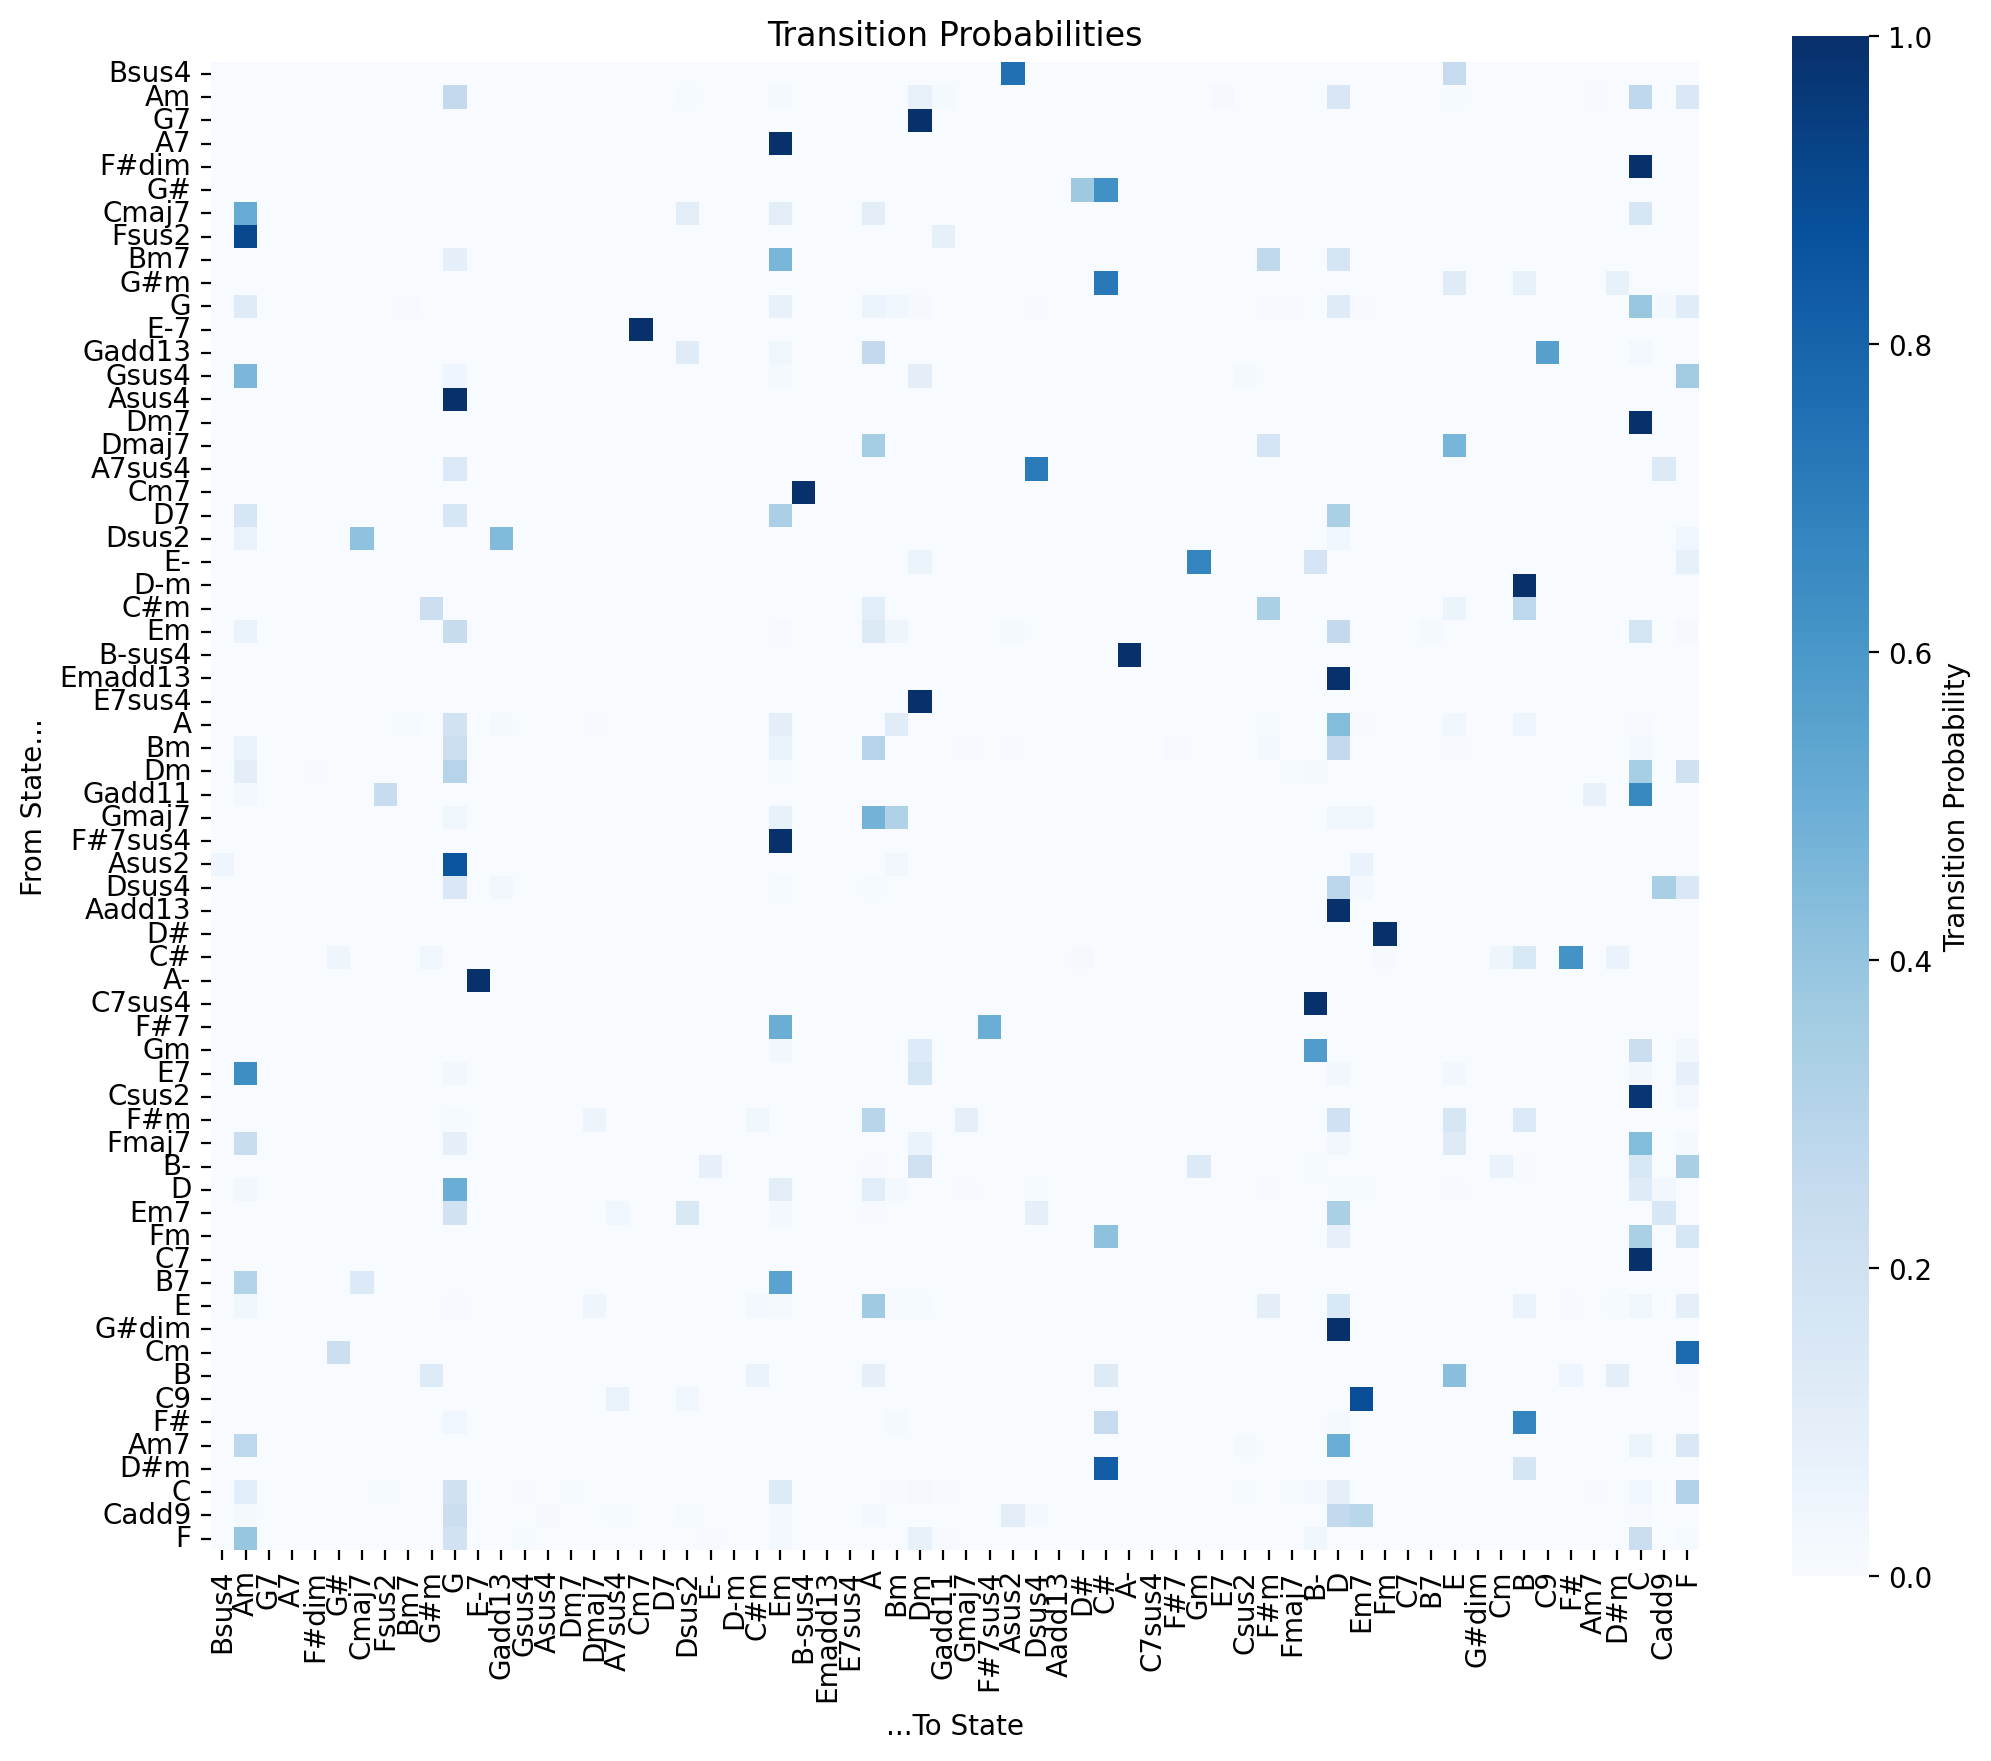

In [ ]:
# ----- probability of chord transitions -----

# normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

#print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
#print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# ----- order 2 Markov transitions -----

order = 2
songs = []
for song in swift:
    T = len(song)
    entry = [' '.join(song[(t-order-1):(t-1)]) for t in range(order+1, T)]
    songs.append(entry) 

states = set()
for song in songs:
    states = states.union( set(song) )
states = list(states)

print('States:\n', np.array(states) )

S = len(states)
tr_counts = np.zeros( (S, S) )

# Fix the transition counting (around line where you have the nested loops):
for song in songs:
    seq = np.array(song)
    for t in range(1,len(seq)):
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_to, index_from] += 1  # TO, FROM not FROM, TO

sums = tr_counts.sum(axis=1, keepdims=True)
state_props = sums/np.sum(sums)

# And fix the transition probability normalization:
tr_pr = np.divide(tr_counts, sums, 
                 out=np.zeros_like(tr_counts), 
                 where=sums!=0)
print('\nTransition Proportions:\n', tr_pr)

States:
 ['E Am' 'Am Am7' 'F#7 Bm' 'C Bm' 'D Bm' 'B- Gm' 'E7sus4 Am' 'B- C' 'A Bm'
 'F#m G' 'Bm F' 'D F' 'Dm Em' 'B G' 'D Am' 'F E7' 'A D' 'Dm E7sus4'
 'Dsus4 A7sus4' 'F E-' 'F# B' 'F E' 'Dsus4 G' 'A F#m' 'Am7 F' 'A F'
 'A Cmaj7' 'F#dim Dm' 'Gm E-' 'Fmaj7 Am' 'E Bsus4' 'Csus2 Gsus4' 'E7 C'
 'D C' 'Bm E' 'D A' 'G Em' 'Dm E' 'B7 D' 'Em E' 'D Em' 'Gadd13 Dsus2'
 'C# G#' 'Bm7 A' 'C#m B' 'D# G#' 'Em7 C9' 'Dm G7' 'A B' 'Asus2 G' 'B D-m'
 'Gadd13 A' 'B- E-' 'Dsus4 F' 'F#m Dmaj7' 'A Gadd13' 'D7 C' 'A Em7'
 'Csus2 C' 'D7 G' 'Cadd9 Em7' 'Bm G' 'F Dsus4' 'Cmaj7 Am' 'F Fm' 'Em F#7'
 'G#m C#' 'F B-' 'B D#m' 'C C' 'Em F' 'E D' 'F#m Bm' 'B F#' 'C# G#m'
 'A7sus4 Em7' 'Emadd13 G' 'Dmaj7 F#m' 'C Am' 'G A' 'Gm B-' 'G Dsus4'
 'D Dsus4' 'G D7' 'Dm Fmaj7' 'Dm E-' 'F Fmaj7' 'D Dm' 'Dm C' 'F#7sus4 F#7'
 'G D' 'D Fm' 'F Em' 'F Dsus2' 'Bm D' 'B- F' 'G F#m' 'E7 F' 'Am Bm'
 'G Fmaj7' 'Em A' 'C Gadd13' 'F#m D' 'D Aadd13' 'Dsus2 Gadd13' 'Em C'
 'Am B7' 'Em Cadd9' 'C E' 'G G' 'Bm Gmaj7' 'D Emadd13' 'D Em7' 'C Gadd11

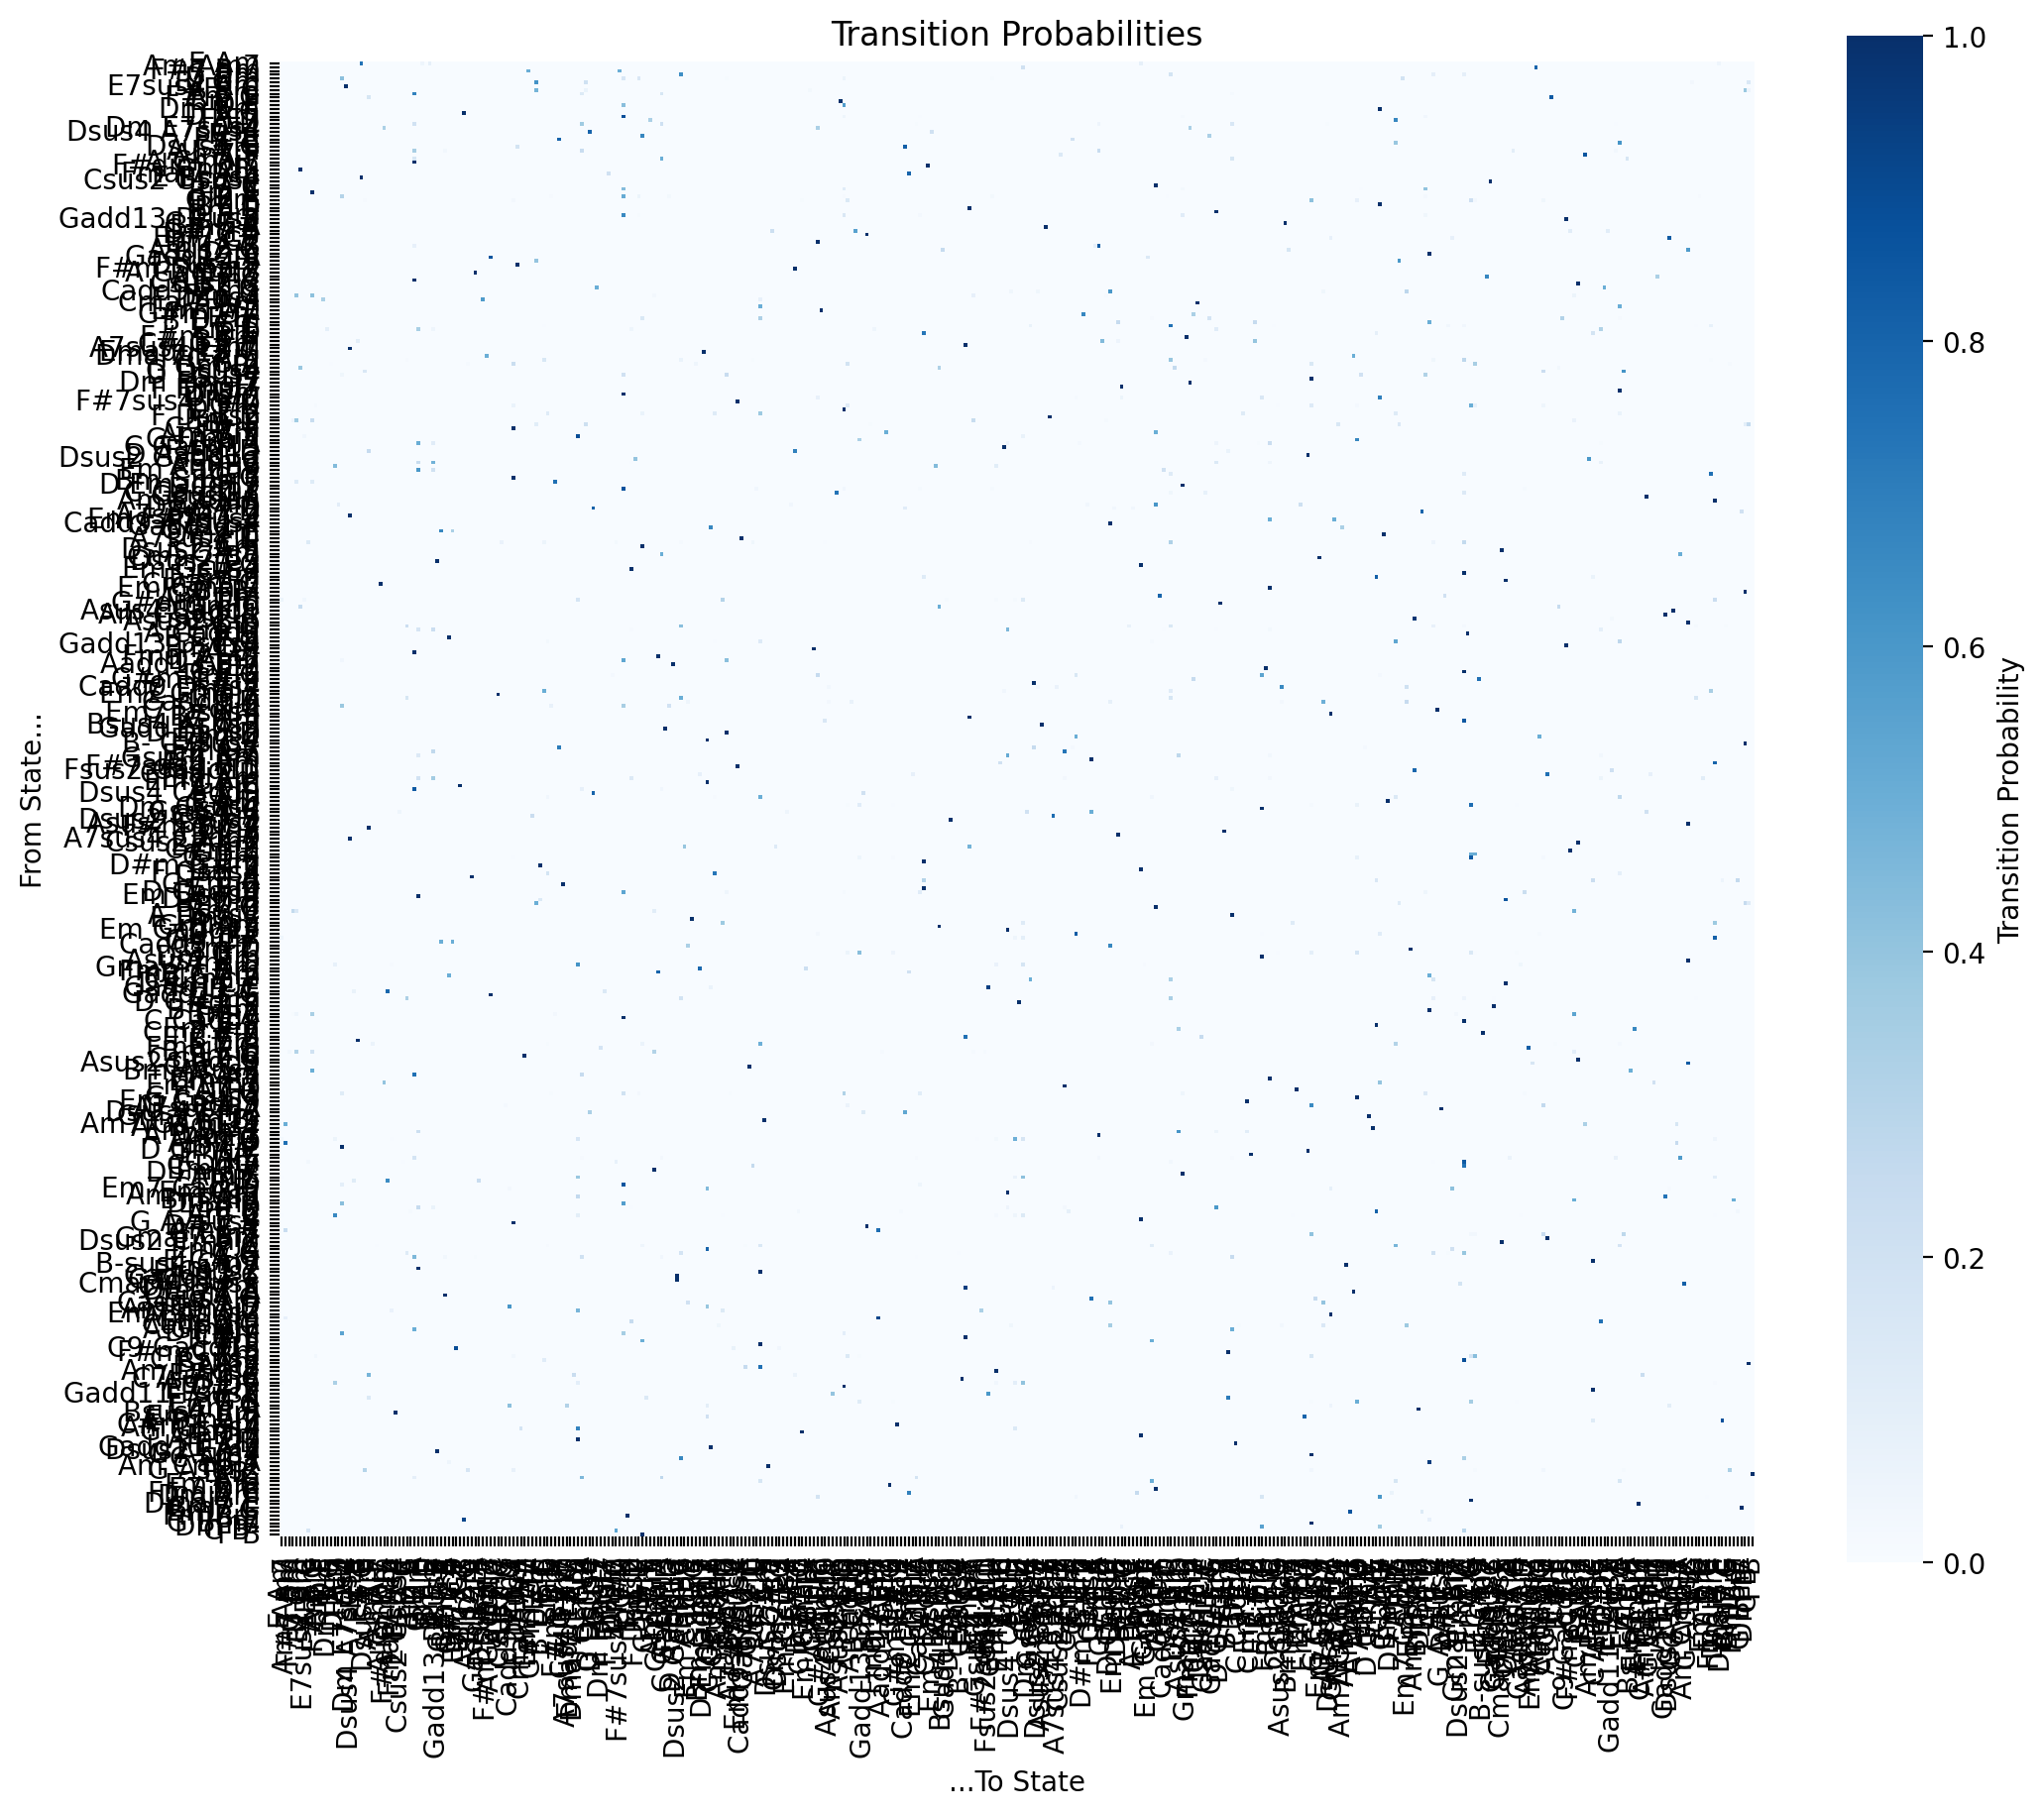

In [ ]:
# more transition probabilities - not helpful lol
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# ----- connections -----

G = nx.from_numpy_array(tr_pr, create_using=nx.DiGraph())

# Check if strongly connected (every chord can reach every other chord)
is_strongly_connected = nx.is_strongly_connected(G)
print(f"Strongly connected: {is_strongly_connected}")

# Check if weakly connected (ignoring edge direction)
is_weakly_connected = nx.is_weakly_connected(G)
print(f"Weakly connected: {is_weakly_connected}")

# Get connected components if not connected
if not is_strongly_connected:
    strong_components = list(nx.strongly_connected_components(G))
    print(f"Number of strongly connected components: {len(strong_components)}")


Strongly connected: False
Weakly connected: False
Number of strongly connected components: 4


In [18]:
# ----- generate new swift music -----

np.random.seed(10000) # Favorite
#np.random.seed(5000) 
initial_state = np.random.choice(states) # Choose an initial state at random

#initial_state = 'E B'
initial_state = 'Am Dm'

state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 

tr_pr = tr_pr.astype(float)  # ensure float division
row_sums = tr_pr.sum(axis=1, keepdims=True)
tr_pr = tr_pr / row_sums

n_sim = 20
simulation = [initial_state]

for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    pr_t = np.nan_to_num(pr_t, nan=0.0)
    pr_t = pr_t / pr_t.sum()
    
    # print(state_index)
    # print(pr_t)
    # print("Sum of probs:", pr_t.sum())

    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation

print(simulation)

Initial state: Am Dm
['Am Dm', 'Dm G7', 'G7 C', 'C Gadd13', 'Gadd13 Am', 'Am Dm', 'Dm G', 'G D', 'D A', 'A F#m', 'F#m D', 'D E', 'E Bm', 'Bm G', 'G A7sus4', 'A7sus4 A', 'A D', 'D Bm', 'Bm Em', 'Em A7']


In [19]:
new_chorale = [state.split()[-1] for state in simulation] # convert to chords

# new swift chorale - except it doesn't sound good ??
stream = music21.stream.Stream()
for chord_symbol in new_chorale:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')